# Credit Card Approval Assignment

## Step 1: Exploratory Data Analysis

**A: Loading and reading the dataset**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [47]:
#Assigned header names to the columns
header_names=['A1','A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df = pd.read_csv('creditcardapproval.csv',names=header_names)

In [48]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


**B: Understanding the data**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [50]:
#no null items found
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [51]:
df.describe

<bound method NDFrame.describe of     A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13  A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..  ...  ...  ..
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0    0   -

[690 rows x 16 columns]>

In [52]:
df['A16'].unique()

array(['+', '-'], dtype=object)

In [53]:
df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

**C: Removing null data**

In [54]:
#Identified missing values "?", replacing them with nan
df = df.replace("?", np.nan)

In [55]:
#Checking if "?" appears 
df['A1'].value_counts()

b    468
a    210
Name: A1, dtype: int64

In [56]:
#Counting the number of nan values
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

**D: Understanding correlation between the columns and creating relevant visualizations**

Plotting approved vs rejected applications

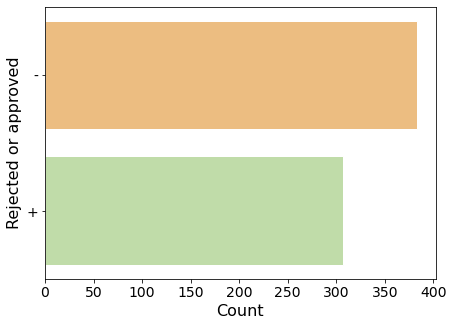

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=df, y='A16',edgecolor="white",palette="Spectral",order=df["A16"].value_counts().index)
total = df['A16'].value_counts().sum()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Rejected or approved", fontsize=16)
plt.xlabel("Count", fontsize=16)

plt.show()

In [58]:
#Roughly the same number of applications have been rejected and approved out of the 690.

Plotting a correlation matrix of all the features to check multicollinearity

In [59]:
print(df.shape)

(690, 16)


In [60]:
#dropping the "nan" rows
df = df.dropna(how = "any")
print(df.shape)

(653, 16)


In [61]:
#converting the numeric columns previously identified as object to float/int
convert_df = {'A2': float,
                'A14': int
                }
 
df = df.astype(convert_df)
print(df.dtypes)

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14      int64
A15      int64
A16     object
dtype: object


In [62]:
numeric_df = df[['A2','A3','A8','A11','A14','A15']]  

In [63]:
corrM = df.corr()
 
corrM

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.217681,0.417647,0.198153,-0.084618,0.029078
A3,0.217681,1.000000,0.300600,0.269834,-0.217076,0.119754
A8,0.417647,0.300600,1.000000,0.327325,-0.064781,0.052159
A11,0.198153,0.269834,0.327325,1.000000,-0.116101,0.058408
A14,-0.084618,-0.217076,-0.064781,-0.116101,1.000000,0.073384
A15,0.029078,0.119754,0.052159,0.058408,0.073384,1.000000


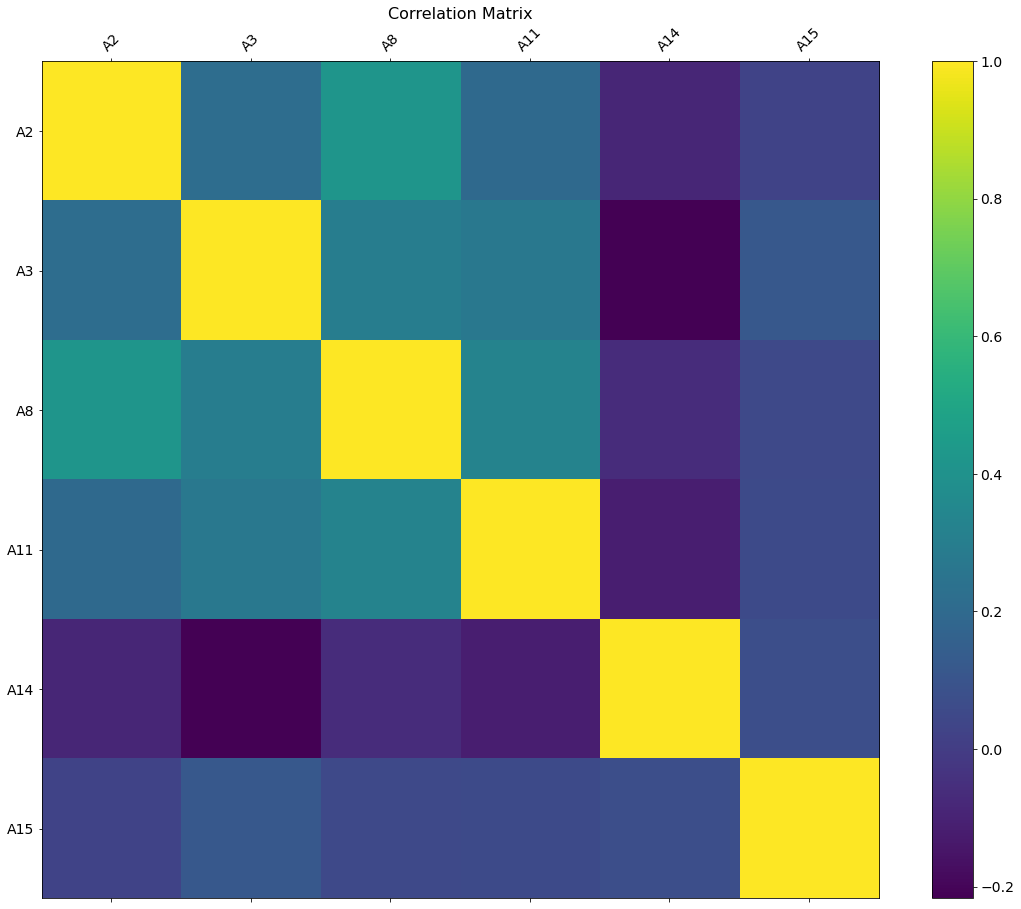

In [64]:
#Visualizing the correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), 
           df.select_dtypes(['number']).columns,
           fontsize=14, 
           rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), 
           df.select_dtypes(['number']).columns,
           fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

A2 and A8 are the most highly correlated columns. 
No columns' correlation values are above 0.5, therefore ***multi collinearity*** is low. 
Linear relationships are established between the numeric variables only. The y variable for the model (approval and rejection) is not included in the matrix as it's a categorical variable.

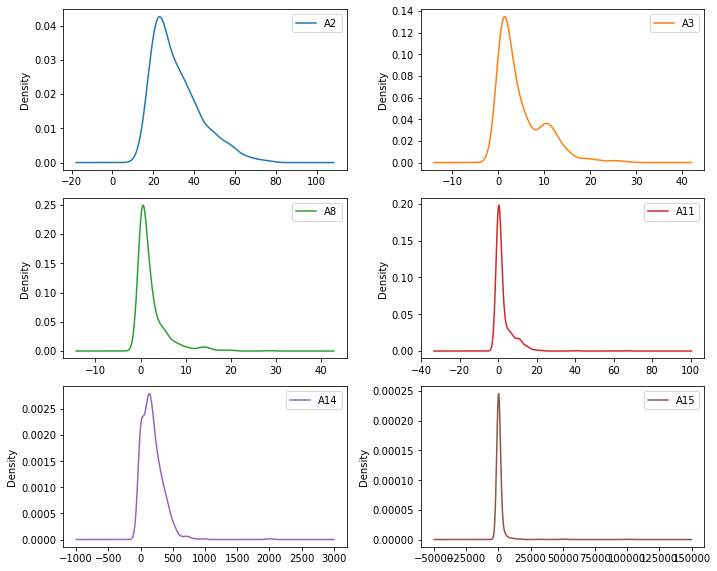

In [65]:
#Next, we are checking the distribution of the individual features
numeric_df.plot(kind='kde', layout=(3,2), subplots=True, figsize=(10,8), sharex=False)
plt.tight_layout()
plt.show()

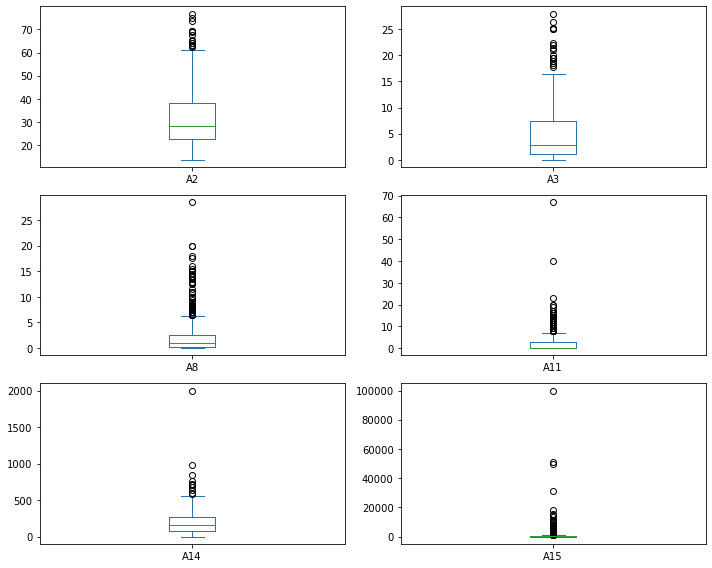

In [66]:
numeric_df.plot(kind='box', layout=(3,2), subplots=True, figsize=(10,8), sharex=False)
plt.tight_layout()
plt.show()

In [67]:
#The independent are close to normally distributed so they don't need to be normalied for the model

Checking for linear relationships

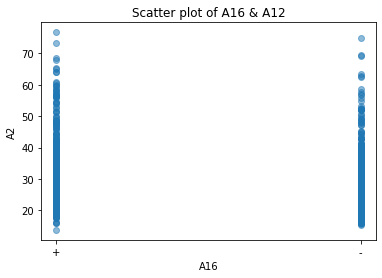

In [68]:
plt.scatter(df['A16'], df['A2'], alpha=0.5)
plt.title('Scatter plot of A16 & A12')
plt.xlabel('A16')
plt.ylabel('A2')
plt.show()

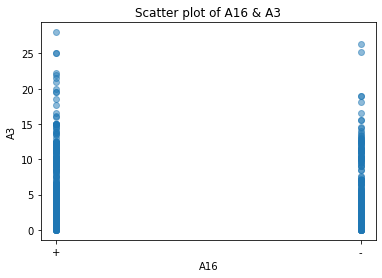

In [69]:
plt.scatter(df['A16'], df['A3'], alpha=0.5)
plt.title('Scatter plot of A16 & A3')
plt.xlabel('A16')
plt.ylabel('A3')
plt.show()

Any ***linearity check for the data type will show a non-linear relation*** as the predictor value is a categorical data - Approved and not approved. This step will be attempted again in the next section, once all variables are converted to numeric type variables. 

---------------------------------------------------------------------------------------------------
## Step 2: Linear Learner

Reflection: Linear Regression deals with continuous values whereas classification problems mandate discrete values. Linear Regression is not suitable for this prediction as it is categorical in nature. The following section attempts to complete the steps of running Linear Regressions to predict categorical outcomes.

**A: Creating the ML pipeline**

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [71]:
#ElasticNet hyperparameters can be tuned
ENpipe = Pipeline(steps=[('scaler', StandardScaler()), 
                        ('reg', ElasticNetCV(cv=10))
                       ])

**B: Converting all columns to numeric type**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    float64
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    int64  
 14  A15     653 non-null    int64  
 15  A16     653 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory usage: 86.7+ KB


In [73]:
#Listing all categorical columns
object_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

#Ordinal-encoding of categorical columns
transformed_df = df.copy()
ordinal_encoder = OrdinalEncoder()
transformed_df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

#Previewing ordinal-encoded features
transformed_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,202,0,0.0
1,0.0,58.67,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,43,560,0.0
2,0.0,24.50,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,280,824,0.0
3,1.0,27.83,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,100,3,0.0
4,1.0,20.17,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,120,0,0.0


In [74]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    float64
 1   A2      653 non-null    float64
 2   A3      653 non-null    float64
 3   A4      653 non-null    float64
 4   A5      653 non-null    float64
 5   A6      653 non-null    float64
 6   A7      653 non-null    float64
 7   A8      653 non-null    float64
 8   A9      653 non-null    float64
 9   A10     653 non-null    float64
 10  A11     653 non-null    int64  
 11  A12     653 non-null    float64
 12  A13     653 non-null    float64
 13  A14     653 non-null    int64  
 14  A15     653 non-null    int64  
 15  A16     653 non-null    float64
dtypes: float64(13), int64(3)
memory usage: 86.7 KB


In [75]:
#All the columns have been converted to numeric columns

Checking for linear relationships

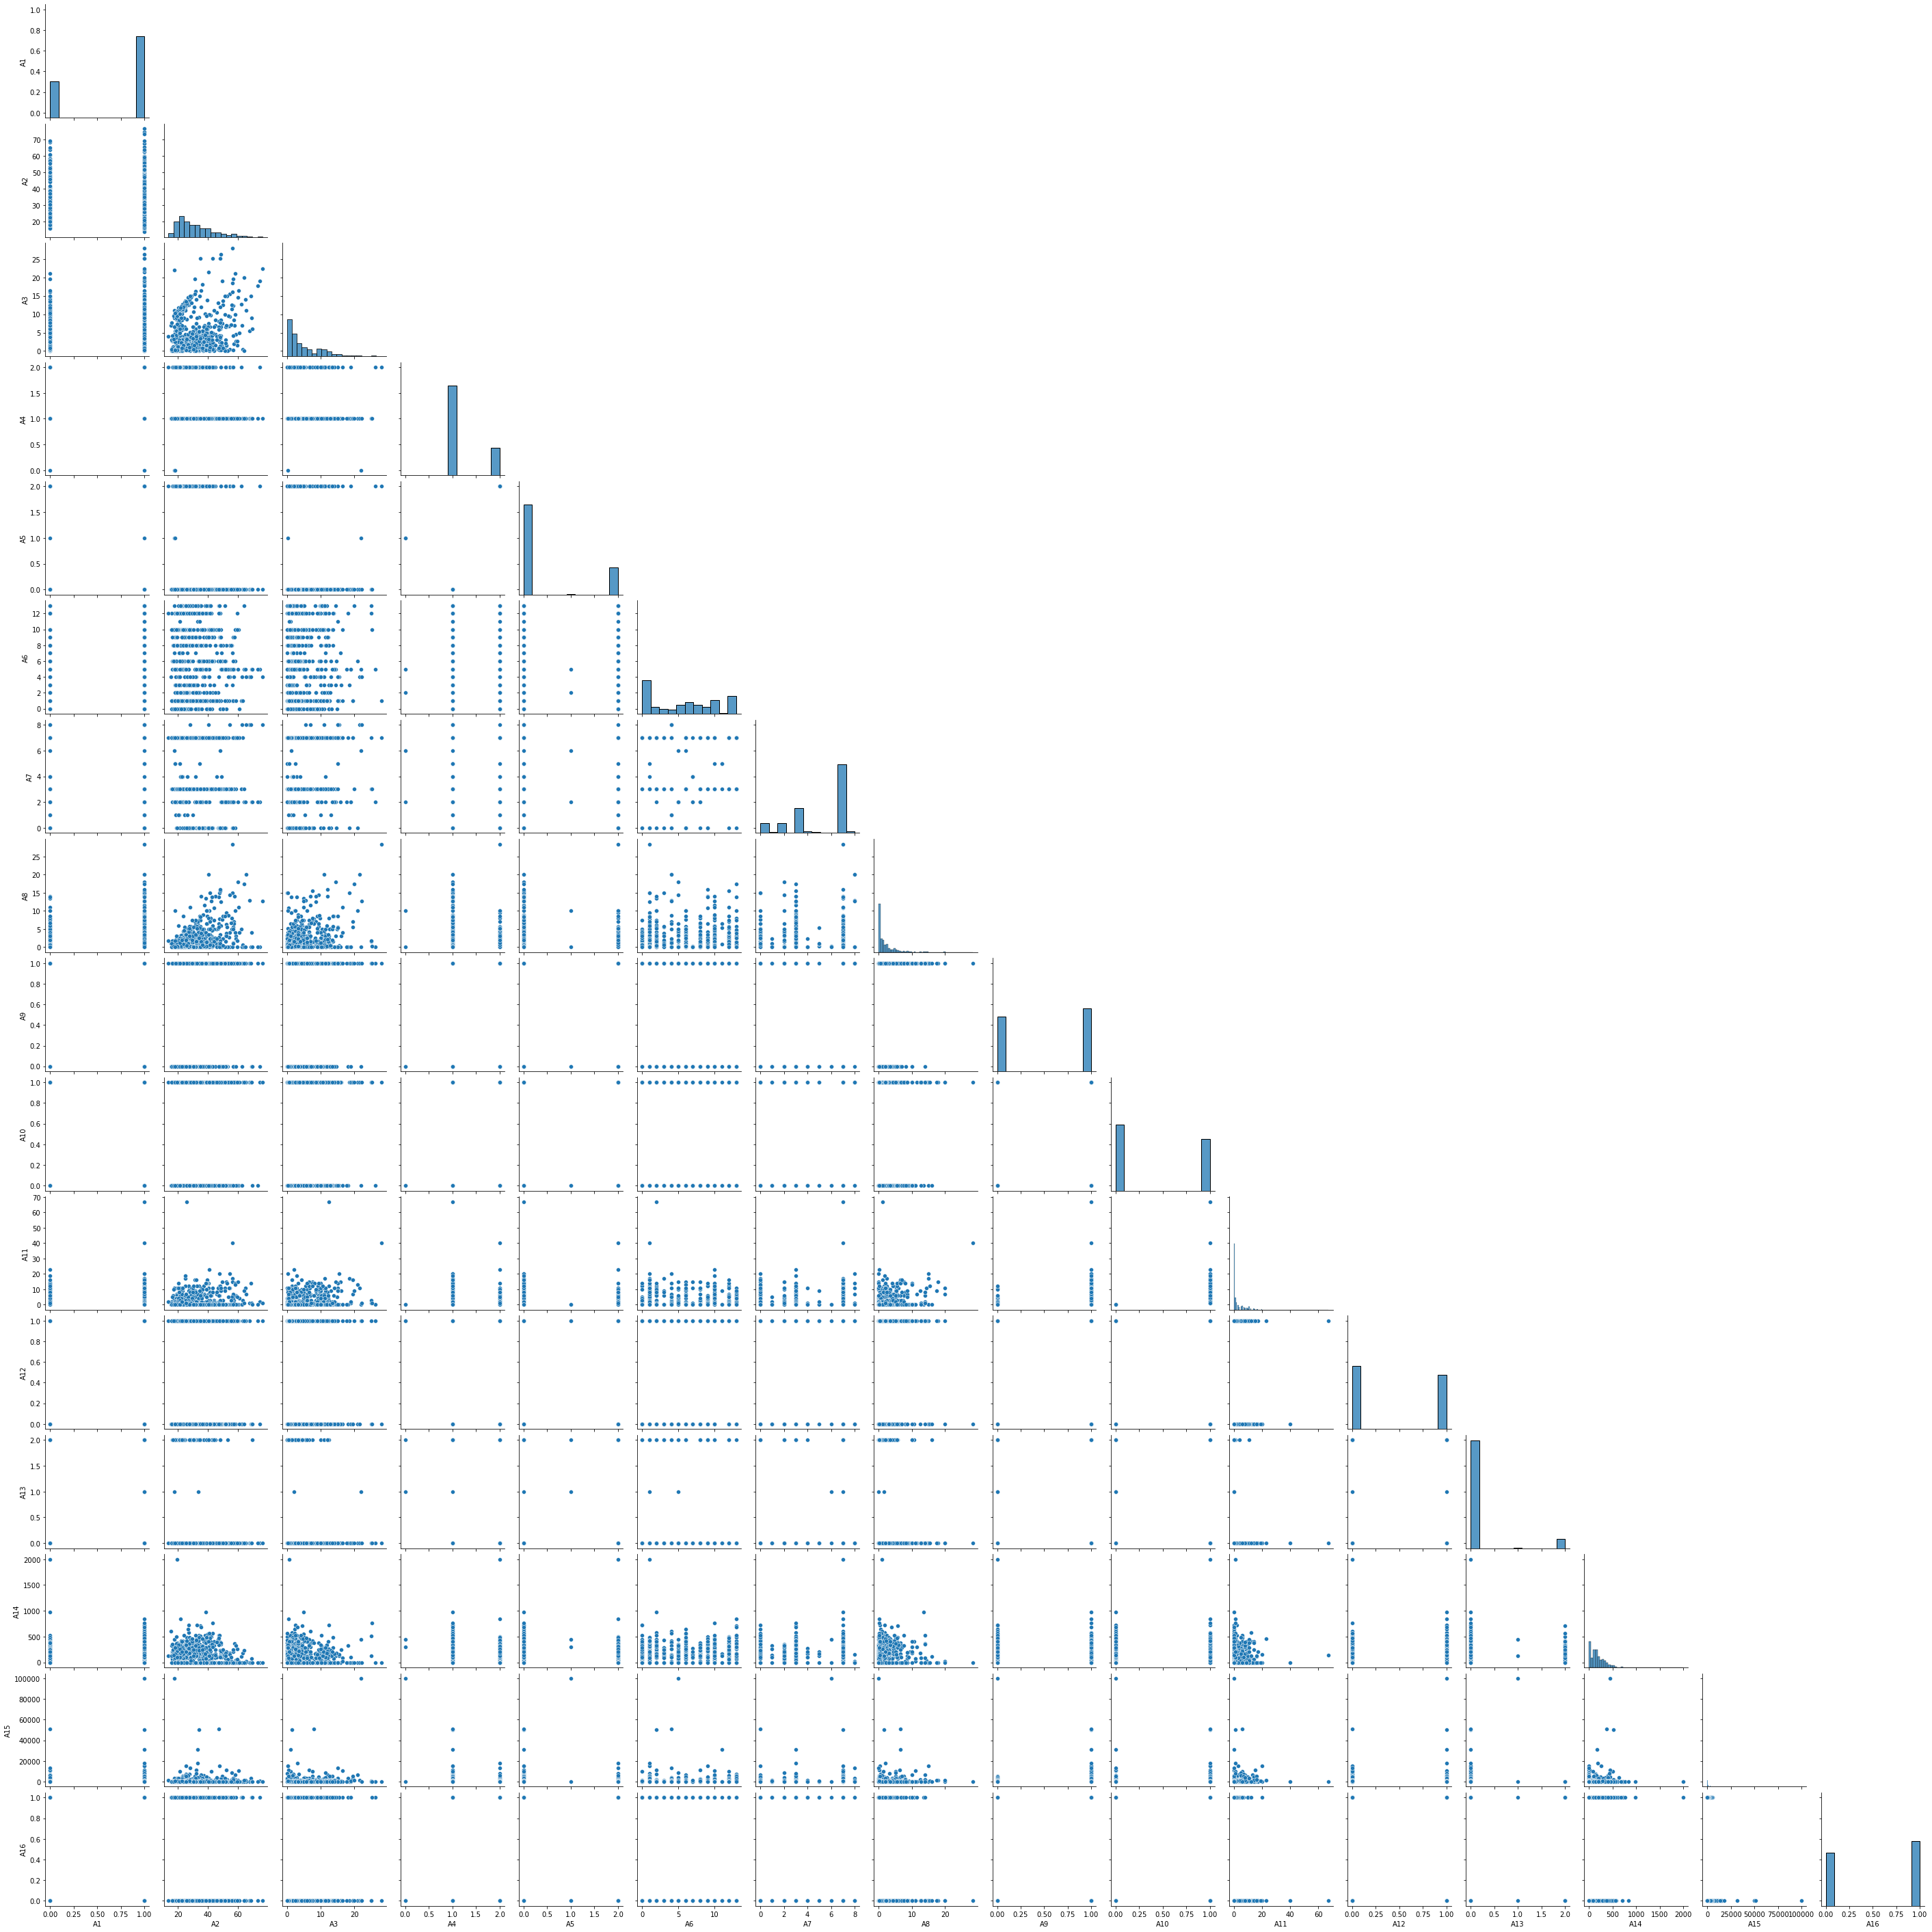

In [76]:
import seaborn as sns

LinX = transformed_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']]

# exploring the dataset
df_LinRel = pd.DataFrame(data=LinX, columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])

g = sns.pairplot(df_LinRel, height=2.5)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

Observation: The bottom most row shows the relationship between the approval and rejection variables withe the rest of the variables. It can be observed that there is no linear relationshop between any of the variables. 

**C: Training the ElasticNet linear model**

In [82]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [83]:
X = transformed_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15']]
y = transformed_df[['A16']]
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=40)

In [84]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((437, 15), (216, 15), (437, 1), (216, 1))

In [85]:
ENpipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', ElasticNetCV(cv=10))])

In [86]:
print(ENpipe.score(X_test, y_test))

0.5814676207952207


In [87]:
print(ENpipe.score(X_train, y_train))

0.5929771847070435


The accuracy of the model is 58% and 59% on the test and training data respectively. This shows that the model is not very good at predicting approvals. The model is also somewhat overfitting the training data as it performs relatively better on the training data but poorly on the evaluation data

The model makes the following assumptions (also listing the steps taken to make sure those assumptions hold) - 
1. Absence of multicollinearity: The multicollinearity graph shows that predictors used in the regression are not correlated with each other.
2. Linearity: Assumes that there is a linear relationship between the predictors and the response variable. A linearity check in the steps earlier, however showed that it is not possible to get a linear relationship between any x variables and the y variables due to the nature of the dataset. 

It can be concluded that the model is not suitable for the data type.

---------------------------------------------------------------------------------------------------
## Step 3: Non-linear Model: Logistic Regression

In [88]:
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [90]:
X = transformed_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15']]
y = transformed_df[['A16']]
X.shape, y.shape

((653, 15), (653, 1))

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=40)
X_train.shape

(489, 15)

In [92]:
logreg = LogisticRegression()
logitpipe = Pipeline(steps=[('clf', logreg)
                       ])

In [93]:
logitpipe.fit(X_train, y_train)

Pipeline(steps=[('clf', LogisticRegression())])

In [94]:
logitpipe.score(X_test, y_test)

0.8353658536585366

In [95]:
logitpipe.score(X_train, y_train)

0.8609406952965235

The model created using logistic regression is good as the accuracy scores on both the test and train data are high, roughly 84% and 86% respectively. 

---------------------------------------------------------------------------------------------------
## Step 4: Handling missing values & running a grid search to fine tune hyperparameters

**A: Handling missing values**

In [96]:
#Step to fill NaNs with the mean
transformed_df.fillna(transformed_df.mean(), inplace=True)

#Counting the number of NaNs in the dataset to verify
transformed_df.isnull().values.sum()

#This shows that there are no missing values in the dataset as they were dropped in step [157]

0

**B: Running the grid search and fine tuning hyperparameters**

In [97]:
indx = ~np.isnan(X).any(axis=1)
X_train = X_train[indx]
y_train = y_train[indx]

##### Linear regression grid search #####

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

#Using grid search to tune the parameters:

parametersGrid = {"max_iter": [100, 500, 1000],
                  "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=10)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

In [99]:
grid.score(X_train, y_train)

0.6436679568329498

In [100]:
grid.score(X_test, y_test)

0.4520743408392406

In [101]:
grid.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 100}

##### Logistic regression grid search #####

In [102]:
#logitpipe.get_params()
parametersGrid = {"max_iter": [10, 500, 1000],
                  "C": [0.1, 10],
                  "penalty": ["l1", "l2", "elasticnet"]
                 }

logit = LogisticRegression()
logitgrid = GridSearchCV(logit, parametersGrid, scoring='accuracy', cv=10)
logitgrid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

In [103]:
logitgrid.score(X_test, y_test)

0.8353658536585366

In [104]:
logitgrid.score(X_train, y_train)

0.8895705521472392

In [105]:
logitgrid.best_params_

{'C': 10, 'max_iter': 500, 'penalty': 'l2'}

##### Cross validation of both the models #####

In [106]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(eNet, X_train, y_train, cv=10))

0.13210826963524633

In [107]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(logit, X_train, y_train, cv=10))

0.8486819727891156

Inference: The accuracy of the best params of the logitstic regression model (84%) is higher than the linear regression model (13%)

---------------------------------------------------------------------------------------------------
## Step 5: Precision recall curve and confusion matrix

**Precision recall curve of the logistic regression model**

In [108]:
y_pred = logitgrid.predict(X_test)

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        74
         1.0       0.89      0.80      0.84        90

    accuracy                           0.84       164
   macro avg       0.84      0.84      0.84       164
weighted avg       0.84      0.84      0.84       164



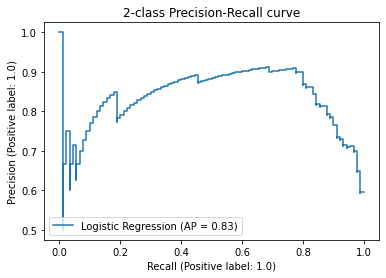

In [110]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    logitgrid, X_test, y_test, name="Logistic Regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Inference: There is a large area under the curve which represents both high recall and high precision

**Confusion matrix of the logistic regression model**

In [111]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[65  9]
 [18 72]]


Note: 
- Plus '+' values in the colummn were marked the value 0, and
- Negative '-' values in the colummn were marked the value 1

Error rate is higher in dissaporoved in reality class - 18 applications were approved by the model but disapproved in reality. 

Similarly, 9 applications were disapproved by the model but approved in reality. 

Overall, the model's accuracy rate in approving or rejecting applications is 83.54% which aligns which the rate grid search rate found in a few steps above when the model was scored.  

---------------------------------------------------------------------------------------------------
## Step 6: Creating the credit approval function

In [112]:
#Main function to take a sample data and use a trained model to predict if sample's application will get approved or not
def prediction(row):
    row = row.to_numpy().reshape(1, -1)
    result = logitpipe.predict(row)
    print(result)
    
    return result

Note: '0' in this dataset would mean approved and '1' would mean rejection

In [113]:
p1 = prediction(X_test.iloc[30])

[1.]


In [114]:
#p1 is rejected

In [115]:
p2 = prediction(X_test.iloc[25])

[0.]


In [116]:
#p2 is approved

In [117]:
p3 = prediction(X_test.iloc[14])

[1.]


In [118]:
#p3 is rejected